In [1]:
import numpy as np
import random
import pandas as pd
import statsmodels.api as sm
import statistics
import time

In [2]:
sizes = np.arange(10, 200, 10)
reps = 1000
print(reps)
sizes = list(sizes)
print(sizes)

1000
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]


In [3]:
# r-square function

def sim_r_sq(n):
    x = np.random.normal(0, 1, n)
    y = [1 + np.random.normal() + v for v in x]
    #add intercept to x
    x = sm.add_constant(x)
    #statsmodels ordinary linear regression
    model = sm.OLS(y, x)
    results = model.fit()
    return results.rsquared
print(sim_r_sq(100))

0.48534724229313186


In [5]:
res = []
for size in sizes:
    start_time = time.time()
    res.append([sim_r_sq(size) for i in range(1, reps)])
    end_time = time.time()
    run_time = end_time-start_time
    print(run_time)    


0.3717176914215088
0.4084303379058838
0.3973820209503174
0.43928003311157227
0.4609980583190918
0.5583715438842773
0.7648491859436035
0.8674585819244385
0.9215974807739258
1.0814909934997559
0.9946188926696777
0.8392093181610107
1.1187989711761475
0.979550838470459
1.0495333671569824
1.0770502090454102
1.1579296588897705
1.0724432468414307
1.4738428592681885


In [6]:
r_sq_q95 = [] 
r_sq_q5 = []
r_sq_mean = []

In [7]:
#flat_res = [item for sublist in res for item in sublist]
# number of vars in each list must be equal to range(sizes)

for sublist in res:
    r_sq_mean.append(statistics.mean(sublist))
    r_sq_q95.append(np.quantile(sublist, 0.95))
    r_sq_q5.append(np.quantile(sublist, 0.05))

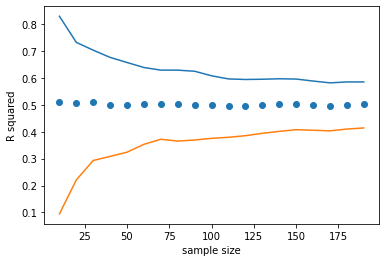

In [8]:
import matplotlib.pyplot as plt

plt.scatter(sizes, r_sq_mean)
plt.plot(sizes, r_sq_q95)
plt.plot(sizes, r_sq_q5)
plt.xlabel("sample size")
plt.ylabel("R squared")
plt.show()